In [54]:
import pandas as pd
import sqlite3

In [55]:
file_path = '../data/checking-logs.sqlite'
con = sqlite3.connect(file_path)
cur = con.cursor()

In [56]:
query = '''
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%'
'''
df_count_pageviews = pd.read_sql(query, con, parse_dates=['datetime'])

df_count_pageviews = df_count_pageviews.datetime.dt.date.value_counts().sort_index().reset_index()
df_count_pageviews.columns = ['date','COUNT']
df_count_pageviews.set_index('date', inplace=True)

In [57]:
query = '''
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
df_count_checker = pd.read_sql(query, con, parse_dates=['timestamp'])
df_count_checker = df_count_checker.timestamp.dt.date.value_counts().sort_index().reset_index()
df_count_checker.columns = ['date','COUNT']
df_count_checker.set_index('date', inplace=True)

In [58]:
df_merge = pd.merge(df_count_pageviews, df_count_checker, on='date')
df_merge.columns = ['views', 'commits']

In [59]:
xticks = [
'2020-04-17',
'2020-04-21',
'2020-04-25',
'2020-04-29',
'2020-05-01',
'2020-05-05',
'2020-05-09',
'2020-05-13',
'2020-05-17',
'2020-05-21'
]

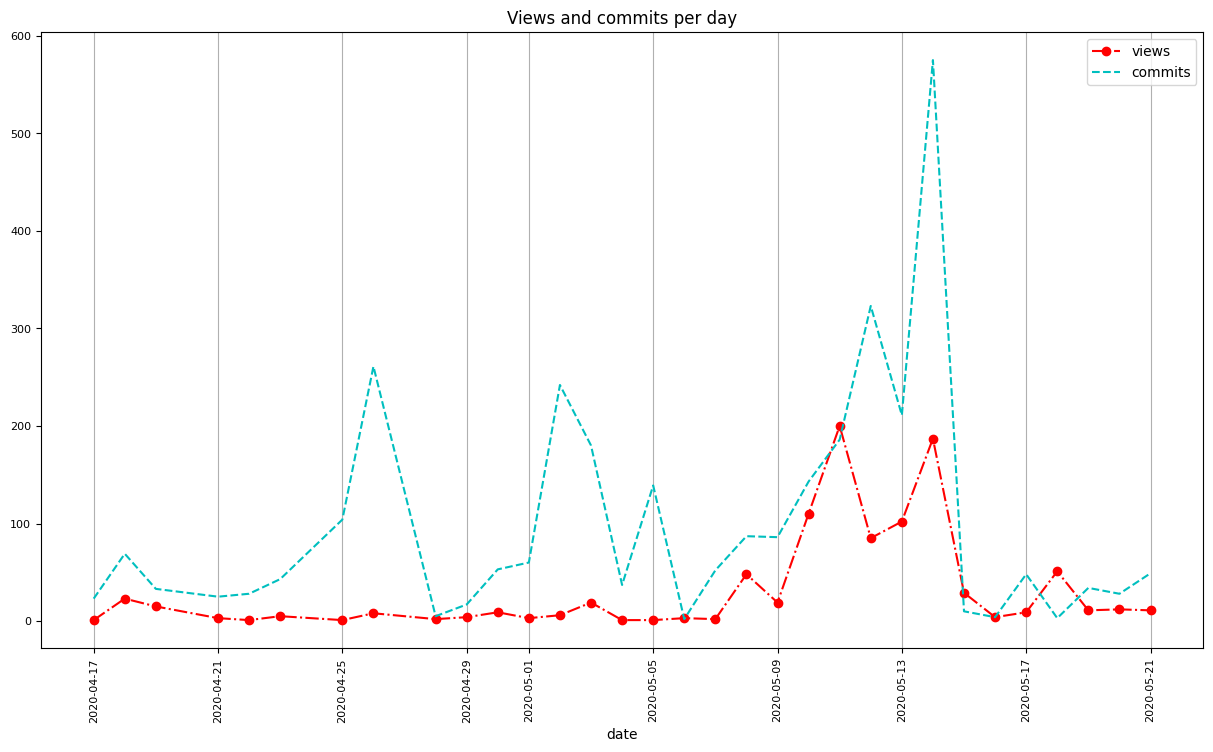

In [60]:
ax = df_merge.plot(fontsize=8,
                   figsize=(15,8),
                   title='Views and commits per day',
                   rot=90,
                   style=['o-.', '--'],
                   color=['r', 'c']
                   )
ax.grid(axis='x')

## - How many times was the number of views larger than 150?

In [63]:
print(f'- The answer is {len(df_merge[df_merge.views > 150])}')

- The answer is 2
